# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

In [3]:
cities


['sao gabriel da cachoeira',
 'portland',
 'sovetskiy',
 'albany',
 'fairbanks',
 'sao filipe',
 'busselton',
 'abu dhabi',
 'puerto ayora',
 'marcona',
 'hamilton',
 'tumannyy',
 'gold coast',
 'faya',
 'kaitangata',
 'peniche',
 'broome',
 'mengcheng',
 'mataura',
 'longyearbyen',
 'cape town',
 'qaanaaq',
 'flinders',
 'ponta do sol',
 'gamba',
 'komsomolskiy',
 'serebryanyy bor',
 'araouane',
 'saldanha',
 'zyryanovsk',
 'bluff',
 'ushuaia',
 'illoqqortoormiut',
 'hobart',
 'bonthe',
 'bongandanga',
 'fort nelson',
 'bamiantong',
 'tual',
 'amderma',
 'kavieng',
 'roald',
 'madang',
 'namtsy',
 'belushya guba',
 'jamestown',
 'avarua',
 'mar del plata',
 'kazalinsk',
 'husavik',
 'airai',
 'saint-augustin',
 'barawe',
 'yellowknife',
 'karasburg',
 'cabo san lucas',
 'port alfred',
 'umzimvubu',
 'ahipara',
 'taolanaro',
 'san cristobal',
 'norman wells',
 'rikitea',
 'samarai',
 'tabas',
 'dunedin',
 'severo-kurilsk',
 'wanaka',
 'holme',
 'karkaralinsk',
 'port elizabeth',
 'lasa

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [40]:
url = "http://api.openweathermap.org/data/2.5/weather?"
city_name=[]
city_id =[]
country=[]
lat=[]
long=[]
temp=[]
clouds=[]
humidity=[]
wind_speed=[]
max_temp=[]


for city in cities:
    query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units="+ 'imperial'
    weather_response1 = requests.get(query_url)
    weather1_json = weather_response1.json()
    try:
        city_name.append(weather1_json['name'])
        city_id.append(weather1_json['id'])
        country.append(weather1_json['sys']['country'])
        temp.append(weather1_json['main']['temp'])
        max_temp.append(weather1_json['main']['temp_max'])
        lat.append(weather1_json['coord']['lat'])
        long.append(weather1_json['coord']['lon'])
        clouds.append(weather1_json['clouds']['all'])
        humidity.append(weather1_json['main']['humidity'])
        wind_speed.append(weather1_json['wind']['speed'])
        print(f"{city}: {weather1_json['id']}")
    except KeyError:
        print(f"{city} is not available")
        

sao gabriel da cachoeira: 3662342
portland: 5746545
sovetskiy: 1491230
albany: 5106841
fairbanks: 5861897
sao filipe: 3374210
busselton: 2075265
abu dhabi: 292968
puerto ayora: 3652764
marcona is not available
hamilton: 4513583
tumannyy is not available
gold coast: 2165087
faya: 110690
kaitangata: 2208248
peniche: 2264923
broome: 5110365
mengcheng: 1800764
mataura: 6201424
longyearbyen: 2729907
cape town: 3369157
qaanaaq: 3831208
flinders: 6255012
ponta do sol: 2264557
gamba: 2400547
komsomolskiy: 1513491
serebryanyy bor: 2016977
araouane: 2460954
saldanha: 3361934
zyryanovsk: 1516438
bluff: 2206939
ushuaia: 3833367
illoqqortoormiut is not available
hobart: 2163355
bonthe: 2409914
bongandanga: 218229
fort nelson: 5955902
bamiantong: 2038482
tual: 1623197
amderma is not available
kavieng: 2094342
roald: 3141667
madang: 2091996
namtsy: 2019488
belushya guba is not available
jamestown: 5122534
avarua: 4035715
mar del plata: 3430863
kazalinsk is not available
husavik: 2629833
airai: 165181

yulara: 6355222
belogorsk: 2026895
nguiu is not available
la union: 3695466
rawson: 3839307
nioro: 2412408
koumac: 2140558
chipinge: 893549
snezhnogorsk: 795243
stephenville crossing: 6156245
popondetta: 2088163
kuala terengganu: 1734705
brigantine: 4500920
spokane: 5811704
champerico: 3598787
puerto escondido: 3520994
ouidah: 2392308
klyuchi: 1503153
vagay: 1487860
istisu: 586320
pundaguitan: 1698289
mabaruma: 3377301
ucluelet: 6171633
sofiysk is not available
naliya: 1262062
iqaluit: 5983720
vardo: 777019
tocopilla: 3869716
norrkoping: 2688368
bac lieu: 1591474
sahrak is not available
goma: 216281
viedma: 3832899
namibe: 3347019
podgornoye: 508362
mehamn: 778707
deniliquin: 2169068
bandarbeyla: 64814
destin: 4153188
ambilobe: 1082243
toliary is not available
saquena: 3692020
chuy: 3443061
uinskoye: 479442
challans: 3027513
dhangadhi: 1283467
santa maria a monte: 3167567
hato mayor: 3504765
quatre cocos: 1106643
jertih: 1736405
hami: 1529484
san juan: 3837213
bashtanka: 712775
altay: 

In [41]:
len(max_temp)

561

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [42]:
weather_dict={'city': city_name,
           'city_id':city_id,
              'country':country,
           'latitude': lat,
           'longitude': long,
           'temperature': temp,
           'max_temp':max_temp,
           'cloudiness': clouds,
           'humidity':humidity,
           'wind_speed':wind_speed}
weather_dict
weather_df=pd.DataFrame(weather_dict)
weather_df.to_csv(r'weather_search.csv',index=False)
weather_df

,city,city_id,country,latitude,longitude,temperature,max_temp,cloudiness,humidity,wind_speed
0,São Gabriel da Cachoeira,3662342,BR,-0.1303,-67.0892,73.67,73.67,95,97,0.78
1,Portland,5746545,US,45.5234,-122.6762,49.84,51.01,100,84,3.00
2,Sovetskiy,1491230,RU,61.3614,63.5842,44.15,44.15,100,66,9.10
3,Albany,5106841,US,42.6001,-73.9662,50.31,53.01,100,45,1.83
4,Fairbanks,5861897,US,64.8378,-147.7164,61.20,62.60,1,23,3.44
...,...,...,...,...,...,...,...,...,...,...
556,Uvarovo,477626,RU,51.9849,42.2615,36.00,36.00,29,77,16.53
557,Chingirlau,610091,KZ,51.0950,54.0814,48.97,48.97,77,77,17.00
558,Avallon,3035768,FR,47.4833,3.9000,46.00,46.00,72,67,6.55
559,Medininagar,1273626,IN,24.0333,84.0667,97.92,97.92,1,9,6.26


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [43]:
len(weather_df.loc[weather_df['humidity']>100])

0

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

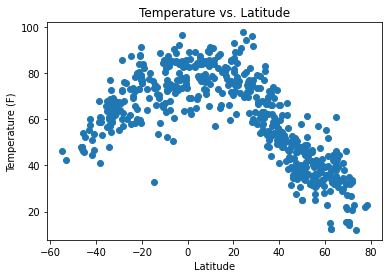

In [44]:
x=weather_df['latitude']
y=weather_df['temperature']

plt.scatter(x,y)
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Temperature vs. Latitude")
plt.savefig('Temp_vs_Lat')
plt.show()

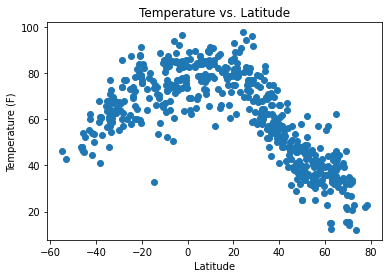

In [45]:
x=weather_df['latitude']
y=weather_df['max_temp']

plt.scatter(x,y)
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Temperature vs. Latitude")
plt.savefig('Temp_vs_Lat')
plt.show()

### Analysis
- As expected, tempertures rise the as you get closer to the equator.  The northern hemispere is still in early sprig and therefore has lower temperatures.  (Analysis 4/22)

## Latitude vs. Humidity Plot

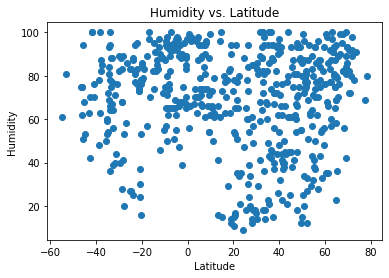

In [46]:
x=weather_df['latitude']
y=weather_df['humidity']

plt.scatter(x,y)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Humidity vs. Latitude")
plt.savefig('Humidity_vs_Lat')
plt.show()

 ### Analysis
 - Latitude doesn't appear to have an effect on high levels of humidity.  Although lower humidity levels are more prominent in the northern hemisphere, which could be a seasonal effect. (Analysis 4/22)

## Latitude vs. Cloudiness Plot

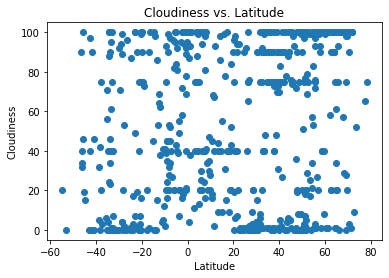

In [47]:
x=weather_df['latitude']
y=weather_df['cloudiness']

plt.scatter(x,y)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Cloudiness vs. Latitude")
plt.savefig('Cloudiness_vs_Lat')
plt.show()

### Analysis
- Latitude doesn't have any affect on cloudiness.  (Analysis 4/22)

## Latitude vs. Wind Speed Plot

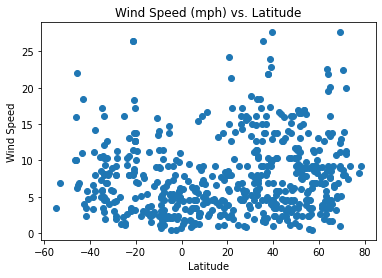

In [48]:
x=weather_df['latitude']
y=weather_df['wind_speed']

plt.scatter(x,y)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Wind Speed (mph) vs. Latitude")
plt.savefig('WindSpeed_vs_Lat')
plt.show()

### Analysis
- There doesn't appear to be any relationship between wind speed and latitude. (Analysis 4/22)

## Linear Regression

In [49]:
#create dataframes for North & South for simplier analysis
northern_hem_df = weather_df.loc[weather_df['latitude']>=0]
#northern_hem_df

southern_hem_df = weather_df.loc[weather_df['latitude']<=0]
southern_hem_df

,city,city_id,country,latitude,longitude,temperature,max_temp,cloudiness,humidity,wind_speed
0,São Gabriel da Cachoeira,3662342,BR,-0.1303,-67.0892,73.67,73.67,95,97,0.78
6,Busselton,2075265,AU,-33.6500,115.3333,73.00,73.00,1,64,1.99
8,Puerto Ayora,3652764,EC,-0.7393,-90.3518,75.38,75.38,92,89,6.17
10,Gold Coast,2165087,AU,-28.0000,153.4333,76.08,77.00,2,53,10.36
12,Kaitangata,2208248,NZ,-46.2817,169.8464,46.99,46.99,32,62,15.99
...,...,...,...,...,...,...,...,...,...,...
546,Mudgee,2156404,AU,-32.5943,149.5871,66.52,66.99,7,39,6.91
547,Puerto Baquerizo Moreno,3652758,EC,-0.9000,-89.6000,75.31,75.31,89,88,9.78
548,Gisborne,2206854,NZ,-38.6533,178.0042,68.00,68.00,5,48,6.58
549,Ilhabela,3461425,BR,-23.7781,-45.3581,69.22,69.22,17,88,2.57


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

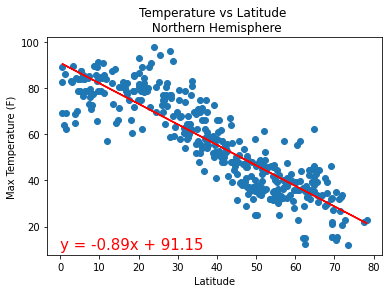

In [50]:
x=northern_hem_df['latitude']
y=northern_hem_df['max_temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
   
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"Temperature vs Latitude \n Northern Hemisphere")
plt.annotate(line_eq,(0,10),fontsize=15,color='red')
plt.savefig('Temp_vs_Lat_NorthernHem')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

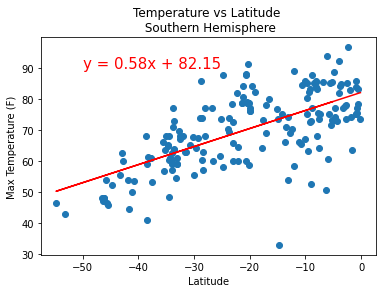

In [51]:
x=southern_hem_df['latitude']
y=southern_hem_df['max_temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
   
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"Temperature vs Latitude \n Southern Hemisphere")
plt.annotate(line_eq,(-50,90),fontsize=15,color='red')
plt.savefig('Temp_vs_Lat_SouthernHem')
plt.show()

### Analysis
- As stated above, latitude has a directly correlated to temperatures.  The closer you are to the equator, the higher the temperatures.  This is evidenced with the regression line for both the northern and southern hemispheres graphs. (Analysis 4/22)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

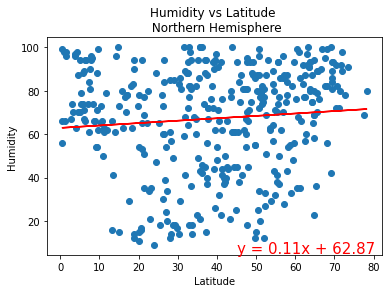

In [52]:
x=northern_hem_df['latitude']
y=northern_hem_df['humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
   
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f"Humidity vs Latitude \n Northern Hemisphere")
plt.annotate(line_eq,(45,5),fontsize=15,color='red')
plt.savefig('Humidity_vs_Lat_NorthernHem')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

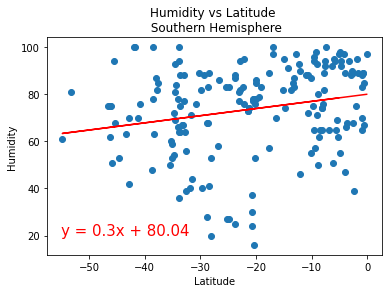

In [53]:
x=southern_hem_df['latitude']
y=southern_hem_df['humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
   
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f"Humidity vs Latitude \n Southern Hemisphere")
plt.annotate(line_eq,(-55,20),fontsize=15,color='red')
plt.savefig('Humidity_vs_Lat_SouthernHem')
plt.show()

### Analysis
- Latitude no affect on humidity for either the northern or southern hemisphere.  This is confirmed with the respective low r-values, northern (0.24) and southern (0.04).  (Analysis 4/23)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

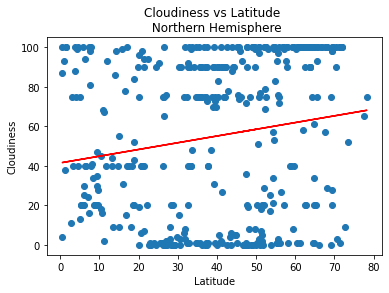

Linear regression: y = 0.34x + 41.49


In [54]:
x=northern_hem_df['latitude']
y=northern_hem_df['cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"Cloudiness vs Latitude \n Northern Hemisphere")
plt.savefig('Cloudiness_vs_Lat_NorthernHem')
plt.show()
print(f"Linear regression: {line_eq}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

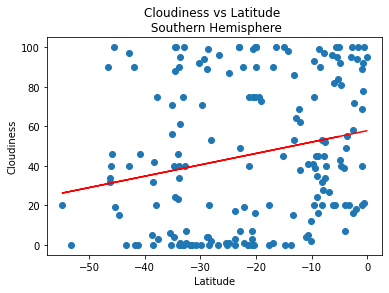

Linear regression: y = 0.58x + 57.8


In [55]:
x=southern_hem_df['latitude']
y=southern_hem_df['cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"Cloudiness vs Latitude \n Southern Hemisphere")
plt.savefig('Cloudiness_vs_Lat_SouthernHem')
plt.show()
print(f"Linear regression: {line_eq}")

### Analysis
Latitude no affect on cloudiness for either the northern or southern hemisphere. This is confirmed with the respective low r-values, northern (0.34) and southern (0.3).  The northern hemisphere's higher r-value may be due to seasonality as it is early spring.  (Analysis 4/23)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

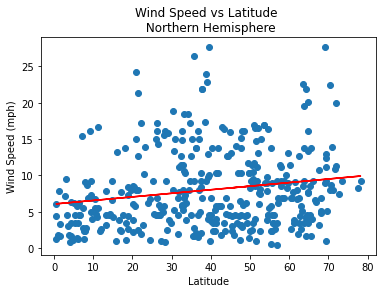

Linear regression: y = 0.05x + 6.07


In [56]:
x=northern_hem_df['latitude']
y=northern_hem_df['wind_speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"Wind Speed vs Latitude \n Northern Hemisphere")
plt.annotate(line_eq,(0,30),fontsize=15,color='red')
plt.savefig('WindSpeed_vs_Lat_NorthernHem')
plt.show()
print(f"Linear regression: {line_eq}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

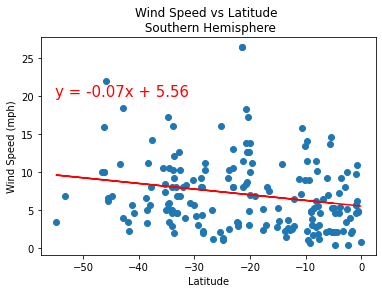

Linear regression: y = -0.07x + 5.56


In [57]:
x=southern_hem_df['latitude']
y=southern_hem_df['wind_speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"Wind Speed vs Latitude \n Southern Hemisphere")
plt.annotate(line_eq,(-55,20),fontsize=15,color='red')
plt.savefig('WindSpeed_vs_Lat_SouthernHem')
plt.show()
print(f"Linear regression: {line_eq}")

### Analysis
Wind speed is not related to latitude.   This is confirmed with the respective low r-values, northern (0.0) and southern (0.03). (Analysis 4/23)